In [848]:
import pandas as pd
import re

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data:

Additional Information

Two datasets are provided.  the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric".  This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables.   Several attributes that are ordered categorical (such as attribute 17) have been coded as integer.    This was the form used by StatLog.

This dataset requires use of a cost matrix (see below)

Rows = Actual  
Columns = Predicted  

| Actual \ Predicted | Class 0 | Class 1 |
|--------------------|---------|---------|
| Class 0            |   1     |   2     |
| Class 1            |   5     |   0     |
(1 = Good,  2 = Bad)

The rows represent the actual classification and the columns the predicted classification.

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).


In [849]:
curr_path = !pwd
curr_path = curr_path[0]
match = re.search(r'[^/\\]+$', curr_path)
print(f"last dir: {match.group()}")

last dir: notebooks


In [850]:
df = pd.read_csv('../data/german_credit_data/german.data', delim_whitespace=True)
df.head()

/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_67464/3924229361.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/german_credit_data/german.data', delim_whitespace=True)


,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [851]:
df = pd.read_csv('../data/german_credit_data/german.data', delim_whitespace=True, header=None)
df.head()

/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_67464/4245443178.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/german_credit_data/german.data', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [852]:
df[df.columns[-1]].unique()

array([1, 2])

In [853]:
len(df)

1000

In [854]:
df.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

In [855]:
df_numeric = pd.read_csv('../data/german_credit_data/german.data-numeric', delim_whitespace=True, header=None)
df_numeric.head()

/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_67464/3154384313.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_numeric = pd.read_csv('../data/german_credit_data/german.data-numeric', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [856]:
df_numeric[df_numeric.columns[-1]].unique()


array([1, 2])

In [857]:
len(df_numeric)

1000

In [858]:
df_numeric.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
dtype: object

Target value distribution:

In [859]:
target_col = df_numeric.columns[-1]

class_counts = df_numeric[target_col].value_counts()
class_perc = df_numeric[target_col].value_counts(normalize=True) * 100

print("Counts:\n", class_counts)
print("Percentages:\n", class_perc)

Counts:
 24
1    700
2    300
Name: count, dtype: int64
Percentages:
 24
1    70.0
2    30.0
Name: proportion, dtype: float64


Basic statistic applied to dataset:

In [860]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
1,1000.0,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
2,1000.0,2.545,1.083120,0.0,2.0,2.0,4.0,4.0
3,1000.0,32.711,28.252605,2.0,14.0,23.0,40.0,184.0
4,1000.0,2.105,1.580023,1.0,1.0,1.0,3.0,5.0
5,1000.0,3.384,1.208306,1.0,3.0,3.0,5.0,5.0
6,1000.0,2.682,0.708080,1.0,2.0,3.0,3.0,4.0
7,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
8,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0
9,1000.0,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


After reviewing both dataset - I've decided to go continue using only the german.data dataset - as I haven't found the exact column mapping scheme. 23 independent variables within the numeric dataset vs 19 of the original.

I will start of by assigning each column based on documentation.

In [861]:
df.columns = ['status_existing_acc', 'duration_months', 'credit_history', 'purpose', 'amount', 'saving_acc', 'present_empl_since', 'installment_rate_perc', 'personal_status_sex', 'other_debtors',
                        'residence_since', 'property', 'age', 'other_installment_plans', 'housing', 'no_existing_credits', 'job', 'no_people_liable', 'telephone', 'foreign_worker', 'target']

In [862]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
no_existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
no_people_liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
target,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In the describe function we miss quite a lot of features - obviously because they are categorical.

Let's identify those:

In [863]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['status_existing_acc',
 'credit_history',
 'purpose',
 'saving_acc',
 'present_empl_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [864]:
df.columns

Index(['status_existing_acc', 'duration_months', 'credit_history', 'purpose',
       'amount', 'saving_acc', 'present_empl_since', 'installment_rate_perc',
       'personal_status_sex', 'other_debtors', 'residence_since', 'property',
       'age', 'other_installment_plans', 'housing', 'no_existing_credits',
       'job', 'no_people_liable', 'telephone', 'foreign_worker', 'target'],
      dtype='object')

In [865]:
df['status_existing_acc'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

Status of existing checking account
- A11 :      ... <    0 DM
- A12 : 0 <= ... <  200 DM
- A13 :      ... >= 200 DM / salary assignments for at least 1 year
- A14 : no checking account

***Label Encoding*** - the values have a natural order - more and less money

In [866]:
df['duration_months'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [867]:
df['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

Credit history
- A30 : no credits taken/ all credits paid back duly
- A31 : all credits at this bank paid back duly
- A32 : existing credits paid back duly till now
- A33 : delay in paying off in the past
- A34 : critical account/ other credits existing (not at this bank)

***One hot Encoding*** - different scenarios but not strictly ordered.

In [868]:
df['purpose'].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

Purpose
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others

***One hot encoding*** - no ordering here as well - between such values as car vs business or education

In [869]:
df['amount'].nunique()

921

In [870]:
df['amount'].dtype

dtype('int64')

In [871]:
df['saving_acc'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

Savings account/bonds
- A61 :          ... <  100 DM
- A62 :   100 <= ... <  500 DM
- A63 :   500 <= ... < 1000 DM
- A64 :          .. >= 1000 DM
- A65 :   unknown/ no savings account


***Label encoding*** - ordinal - clear money scale as before

In [872]:
df['present_empl_since'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)

Present employment since
- A71 : unemployed
- A72 :       ... < 1 year
- A73 : 1  <= ... < 4 years  
- A74 : 4  <= ... < 7 years
- A75 :       .. >= 7 years

***Label encoding*** - experience order - more years = experience / stability?

In [873]:
df['installment_rate_perc'].unique()

array([4, 2, 3, 1])

Installment rate in percentage of disposable income - numerical

In [874]:
df['personal_status_sex'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

Personal status and sex
- A91 : male   : divorced/separated
- A92 : female : divorced/separated/married
- A93 : male   : single
- A94 : male   : married/widowed
- A95 : female : single

***One hot and Binary*** - this feature could be divided into two separate features. Sex will be binary and Status - no particular order, even though status could be somehow an indicator.



In [875]:
df['other_debtors'].unique()

array(['A101', 'A103', 'A102'], dtype=object)

Other debtors / guarantors
- A101 : none
- A102 : co-applicant
- A103 : guarantor

***One hot*** - nominal 



In [876]:
df['residence_since'].unique()

array([4, 2, 3, 1])


Present residence since - numerical


In [877]:
df['property'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

Property
- A121 : real estate
- A122 : if not A121 : building society savings agreement/ life insurance
- A123 : if not A121/A122 : car or other, not in attribute 6
- A124 : unknown / no property

***One hot*** - type of property no order


In [878]:
df['age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

Age in years - numerical

In [879]:
df['other_installment_plans'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

Other installment plans 
- A141 : bank
- A142 : stores
- A143 : none

***One hot*** - nominal


In [880]:
df['housing'].unique()

array(['A152', 'A153', 'A151'], dtype=object)

Housing
- A151 : rent
- A152 : own
- A153 : for free

***One hot*** - again nominal

In [881]:
df['no_existing_credits'].unique()

array([2, 1, 3, 4])

Number of existing credits at this bank - numerical

In [882]:
df['job'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

Job
- A171 : unemployed/ unskilled  - non-resident
- A172 : unskilled - resident
- A173 : skilled employee / official
- A174 : management/ self-employed/ highly qualified employee/ officer

***Label encoding*** ordinal: clear hierarchy in job stability/income

In [883]:
df['no_people_liable'].unique()

array([1, 2])

Number of people being liable to provide maintenance for - numerical

In [884]:
df['telephone'].unique()

array(['A192', 'A191'], dtype=object)

Telephone
- A191 : none
- A192 : yes, registered under the customers name

***Binary 0/1***

In [885]:
df['foreign_worker'].unique()

array(['A201', 'A202'], dtype=object)

foreign worker
- A201 : yes
- A202 : no

***Binary 0/1***

In [886]:
df['target'].unique()

array([1, 2])

Target
- 1: Good 
- 2: Bad

For simplicity and clarity - change to 1/0 as well ***Binary***

Summary of each variable:
- Label encoding: col 1, 6, 7, 1 7
- One Hot Encoding: col 3, 4, 9, 10, 12, 14, 15
- Binary enconding: col 19, 20, 21 (target)
- Numeric - kept as they are originally: col 2, 5, 8, 11, 13, 16, 18

For now - only one col to be modified - a compound feature was identified within sex/status variable.


In [887]:
sex_status_mapping = {
    'A91': ('male', 'divorced_separated'),
    'A92': ('female', 'divorced_separated_married'),
    'A93': ('male', 'single'),
    'A94': ('male', 'married_widowed'),
    'A95': ('female', 'single')
}

df[['sex', 'marital_status']] = df['personal_status_sex'].map(sex_status_mapping).apply(pd.Series)

Getting rid of the previous column.

In [888]:
df.drop(columns=['personal_status_sex'], inplace=True)

df['sex'].unique()

array(['male', 'female'], dtype=object)

In [889]:
df['marital_status'].unique()

array(['single', 'divorced_separated_married', 'divorced_separated',
       'married_widowed'], dtype=object)

For now - basic column cleaning is settled - now encoding steps - starting off with Binary values (col 19, 20, 21 (target), + new value 'sex')
- 'telephone'
- 'foreign_worker'
- 'target'
- 'sex'

In [890]:
df['telephone'] = df['telephone'].map({'A191': 0, 'A192':1})
df['telephone'].unique()

array([1, 0])

In [891]:
df['foreign_worker'] = df['foreign_worker'].map({'A201':0, 'A202':1})
df['foreign_worker'].unique()

array([0, 1])

In [892]:
df['target'] = df['target'].map({2: 0, 1:1})
df['target'].unique()

array([1, 0])

In [893]:
df['sex'] = df['sex'].map({'male': 0, 'female':1})
df['sex'].unique()

array([0, 1])

Label encoding: 
- status_existing_acc
- saving_acc
- present_empl_since
- job

In [894]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['status_existing_acc', 'saving_acc', 'present_empl_since', 'job']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df[label_cols].head()

,status_existing_acc,saving_acc,present_empl_since,job
0,0,4,4,2
1,1,0,2,2
2,3,0,3,1
3,0,0,3,2
4,0,0,2,2


One Hot Encoding: 
- 'credit_history'
- 'purpose'
- 'other_debtors'
- 'property'
- 'other_installment_plans'
- 'housing'
- 'marital_status'

In [895]:
one_hot_cols = [
    'credit_history', 'purpose', 'other_debtors', 
    'property', 'other_installment_plans', 'housing', 'marital_status'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.head()

,status_existing_acc,duration_months,amount,saving_acc,present_empl_since,installment_rate_perc,residence_since,age,no_existing_credits,job,...,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,marital_status_divorced_separated_married,marital_status_married_widowed,marital_status_single
0,0,6,1169,4,4,4,4,67,2,2,...,False,False,False,False,True,True,False,False,False,True
1,1,48,5951,0,2,2,2,22,1,2,...,False,False,False,False,True,True,False,True,False,False
2,3,12,2096,0,3,2,3,49,1,1,...,False,False,False,False,True,True,False,False,False,True
3,0,42,7882,0,3,2,4,45,1,2,...,True,False,False,False,True,False,True,False,False,True
4,0,24,4870,0,2,3,4,53,2,2,...,False,False,True,False,True,False,True,False,False,True


Dataset is now fully numeric, with ordinal categorical variables label-encoded, nominal variables one-hot encoded, binary yes/no features mapped to 0/1, and the target transformed to 0 = good, 1 = bad.

EDA Visualizations for each col correlation + few of them seprately - chosen scenarios:

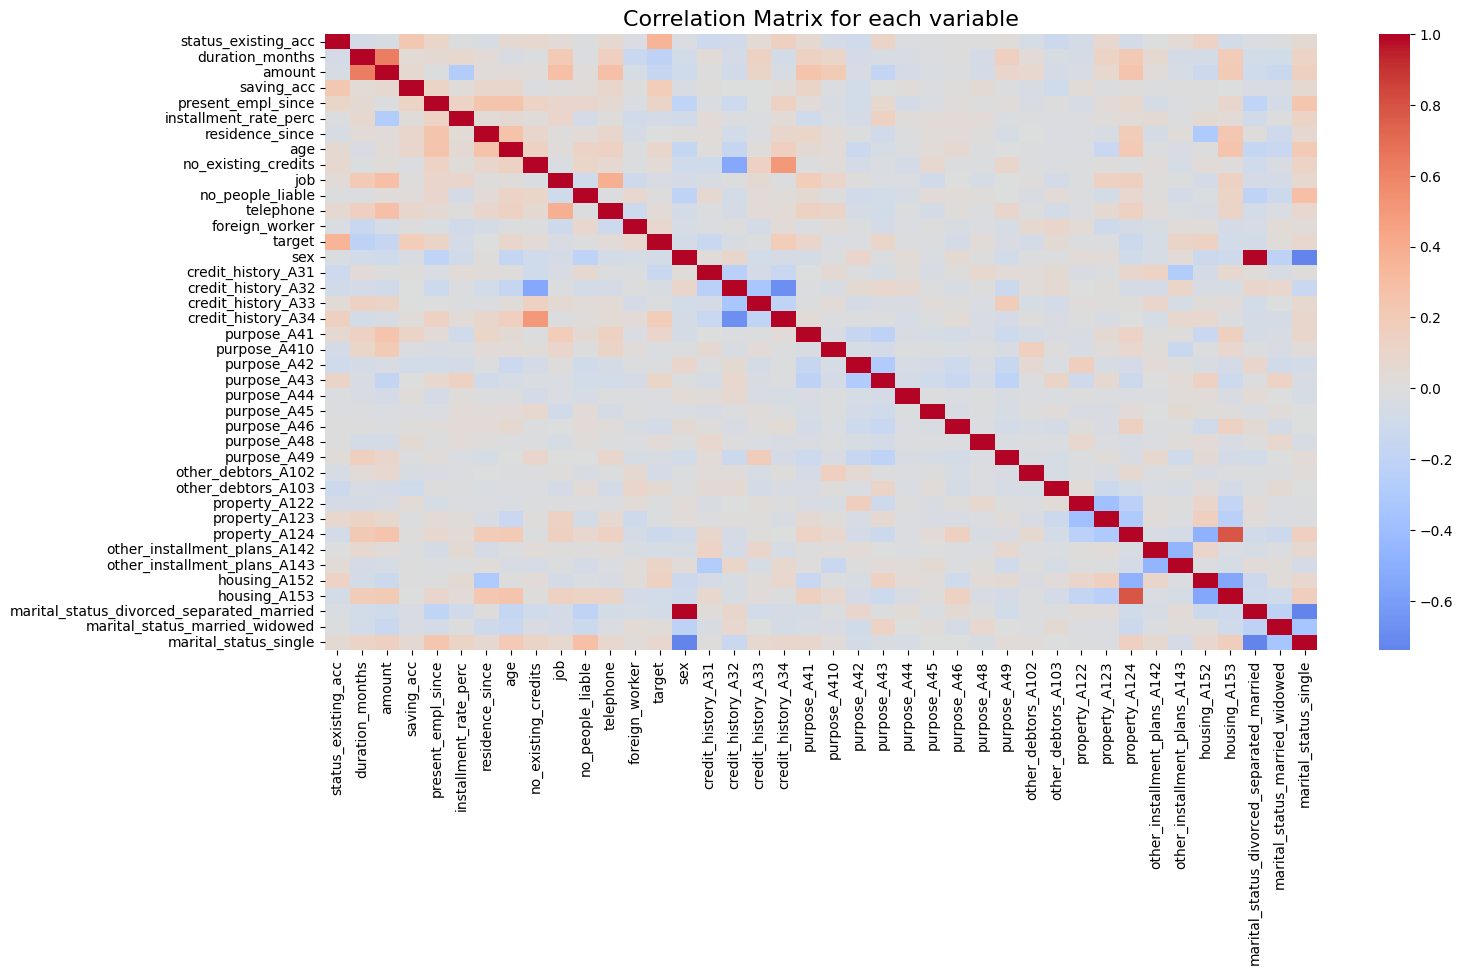

In [896]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Matrix for each variable", fontsize=16)
plt.show()

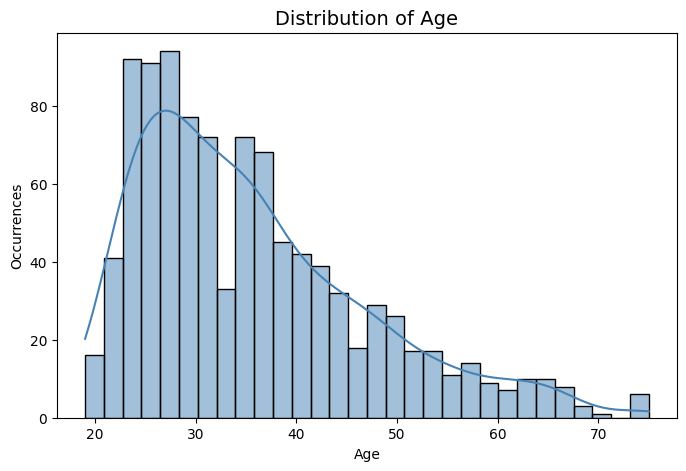

In [897]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Occurrences")
plt.show()

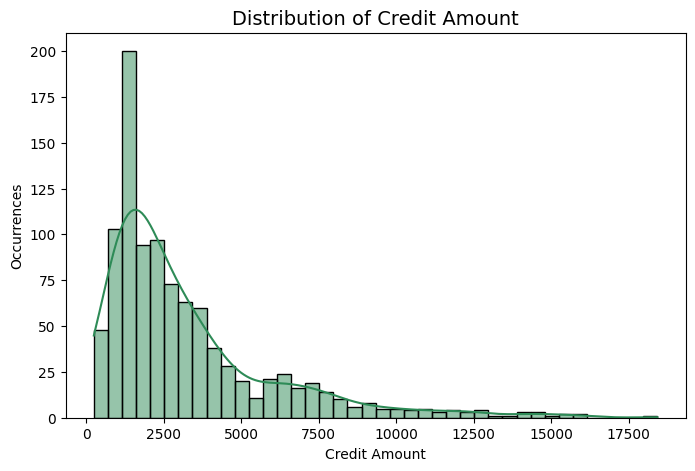

In [898]:
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=40, kde=True, color='seagreen')
plt.title("Distribution of Credit Amount", fontsize=14)
plt.xlabel("Credit Amount")
plt.ylabel("Occurrences")
plt.show()

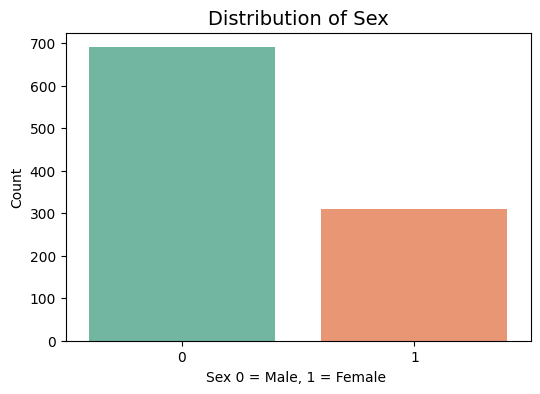

In [899]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, hue='sex', palette='Set2', legend=False)
plt.title("Distribution of Sex", fontsize=14)
plt.xlabel("Sex 0 = Male, 1 = Female ")
plt.ylabel("Count")
plt.show()

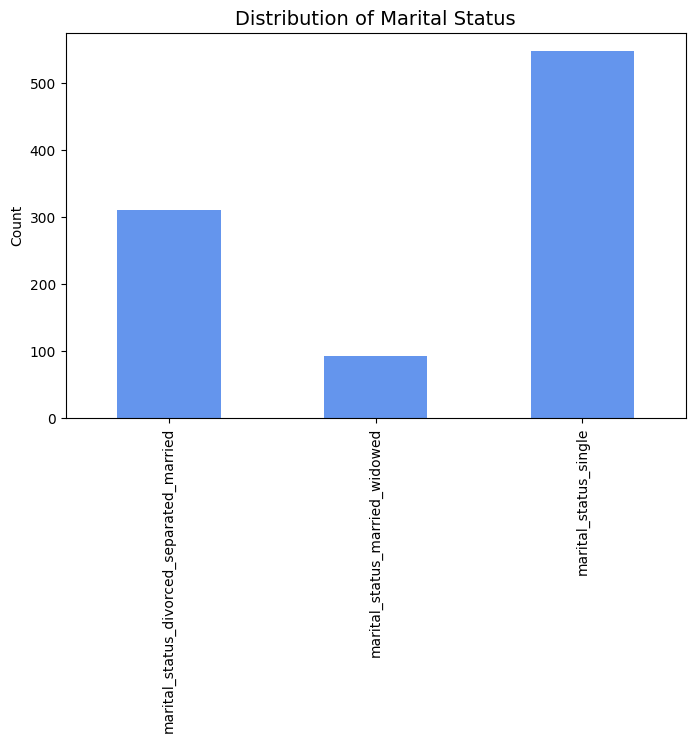

In [900]:
plt.figure(figsize=(8,5))
status_cols = [col for col in df.columns if col.startswith('marital_status')]
df[status_cols].sum().plot(kind='bar', color='cornflowerblue')
plt.title("Distribution of Marital Status", fontsize=14)
plt.ylabel("Count")
plt.show()

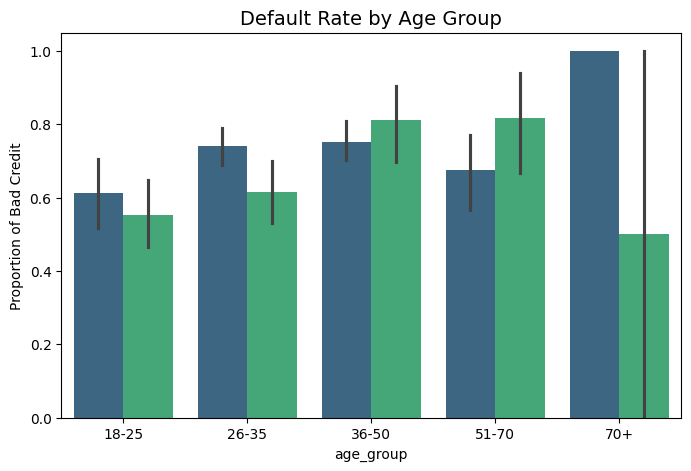

In [908]:
df['age_group'] = pd.cut(df['age'], bins=[18,25,35,50,70,100],
                         labels=['18-25','26-35','36-50','51-70','70+'])

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='target', data=df, hue='sex', legend=False, palette='viridis')

plt.title("Default Rate by Age Group", fontsize=14)
plt.ylabel("Proportion of Bad Credit")
plt.show()